# Demo

This notebook shows basic capabilities of this package

In [11]:
# Import all necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from optinet.create_graph import CitiesNodes 

plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams['figure.dpi'] =  200
plt.style.use('ggplot')


In [12]:
# Read the database
df = pd.read_csv("../Data/Cities.csv", sep=";", decimal=",")
tdf = df[:50]
df.head(20)

,City,District,Province,Population,Latitude,Longitude
0,Warszawa,powiat Warszawa,mazowieckie,1794166,52.259,21.020
1,Kraków,powiat Kraków,małopolskie,779966,50.060,19.959
2,Łódź,powiat Łódź,łódzkie,672185,51.770,19.459
3,Wrocław,powiat Wrocław,dolnośląskie,641928,51.110,17.030
4,Poznań,powiat Poznań,wielkopolskie,532048,52.399,16.900
5,Gdańsk,powiat Gdańsk,pomorskie,470805,54.360,18.639
6,Bydgoszcz,powiat Bydgoszcz,kujawsko-pomorskie,344091,53.120,18.010
7,Lublin,powiat Lublin,lubelskie,338586,51.240,22.570
8,Białystok,powiat Białystok,podlaskie,296958,53.139,23.159
9,Katowice,powiat Katowice,śląskie,290553,50.259,19.020


In [13]:
graph = CitiesNodes(tdf)
graph.update(nx.complete_graph(n=len(graph.nodes)))
graph.set_edge_lengths()

Total length of the graph:	305565.818 km
Edge connectivity:		49
Node connectivity:		49
Average node connectivity:	49.000


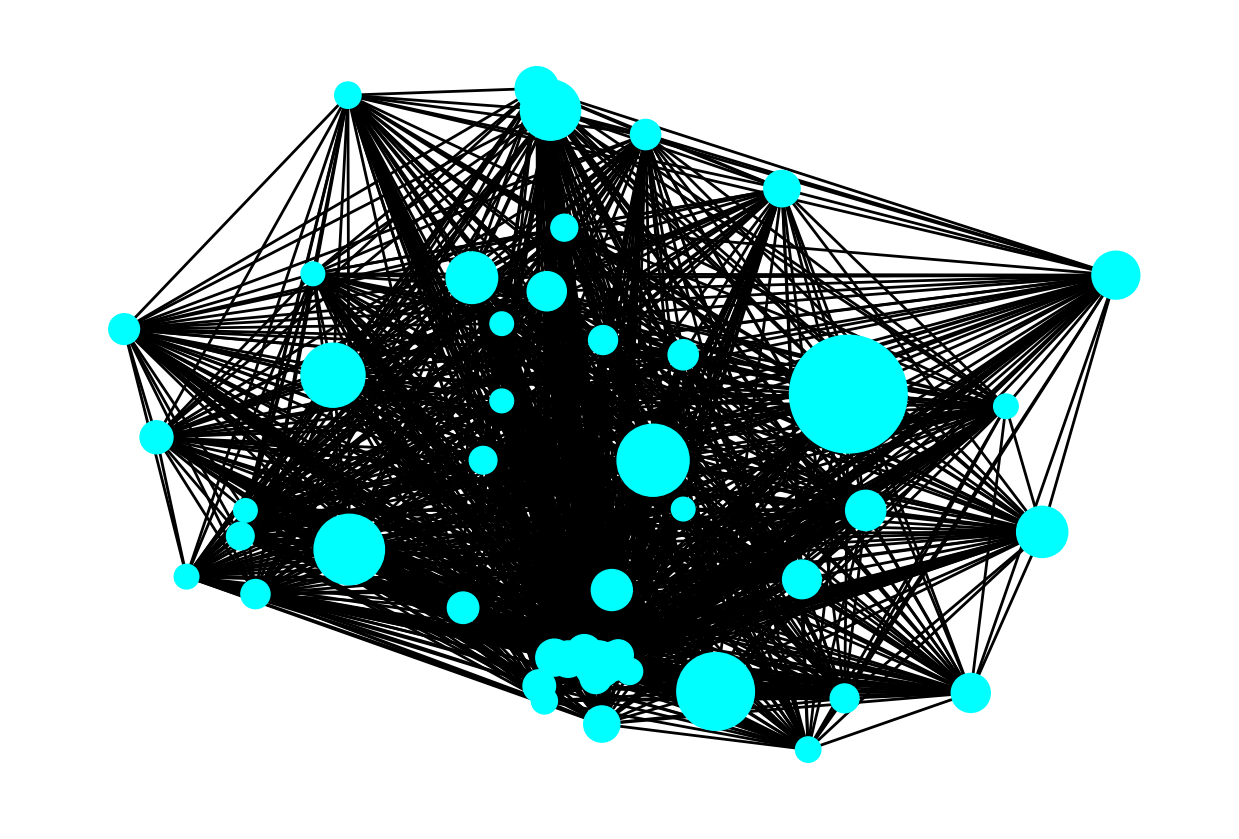

In [14]:
# Complete graph
print(f"Total length of the graph:\t{graph.total_length:.3f} km")
print(f"Edge connectivity:\t\t{nx.edge_connectivity(graph)}")
print(f"Node connectivity:\t\t{nx.node_connectivity(graph)}")
print(f"Average node connectivity:\t{nx.average_node_connectivity(graph):.3f}")
nx.draw(graph, 
        pos=list(zip(tdf.Longitude, tdf.Latitude)), 
        with_labels=False, 
        node_color="cyan", 
        node_size=tdf.Population / 1e3, 
        labels=nx.get_node_attributes(graph,"City"),\
        font_color="k")

Total length of the graph:	2552.701 km
Edge connectivity:		1
Node connectivity:		1
Average node connectivity:	1.000


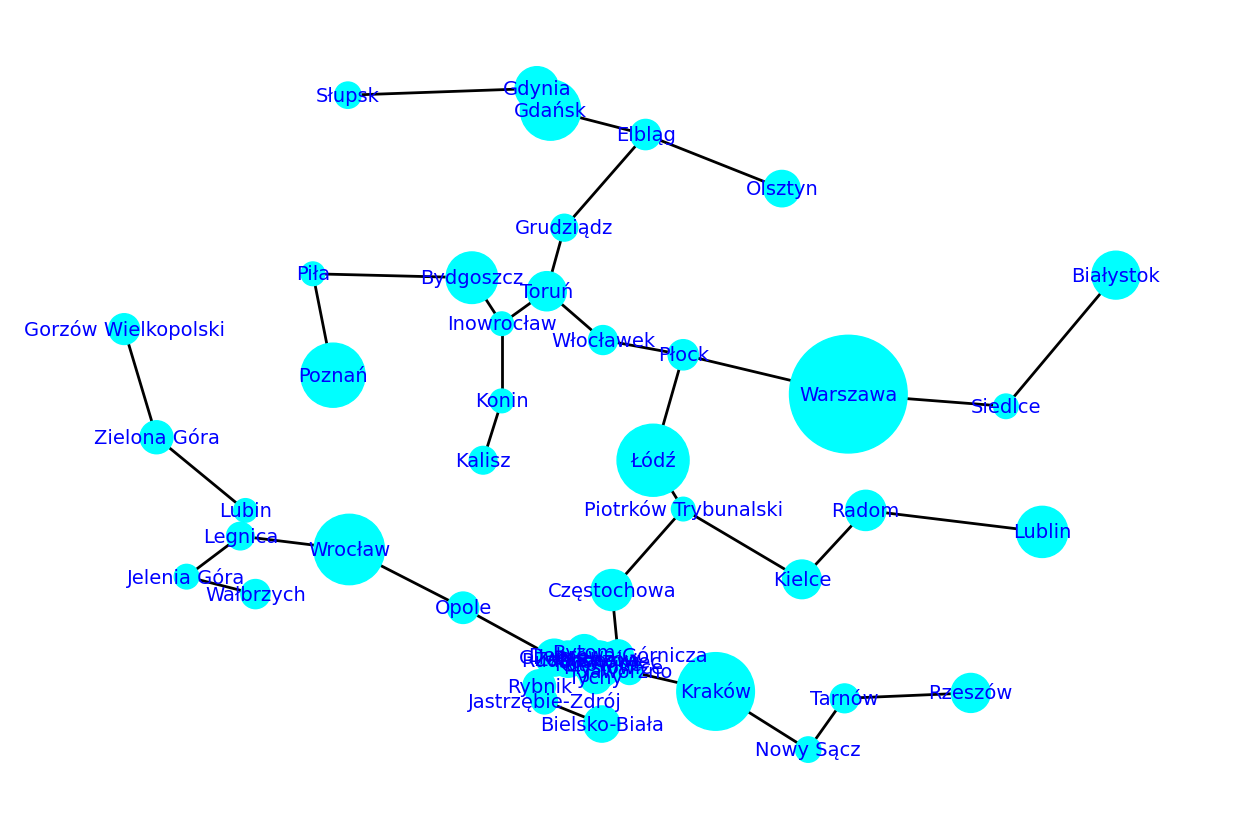

In [23]:
# Minimum spanning tree
min_sp_tree_graph = nx.minimum_spanning_tree(graph, weight="length")
graph.clear_edges()
graph.update(min_sp_tree_graph)
print(f"Total length of the graph:\t{graph.total_length:.3f} km")
print(f"Edge connectivity:\t\t{nx.edge_connectivity(graph)}")
print(f"Node connectivity:\t\t{nx.node_connectivity(graph)}")
print(f"Average node connectivity:\t{nx.average_node_connectivity(graph):.3f}")
nx.draw(graph, 
        pos=list(zip(tdf.Longitude, tdf.Latitude)), 
        with_labels=True, 
        node_color="cyan", 
        node_size=tdf.Population / 1e3, 
        labels=nx.get_node_attributes(graph,"City"),\
        font_color="b",
        font_size=7)

Total length of the graph:	37974.154 km
Edge connectivity:		2
Node connectivity:		2
Average node connectivity:	5.674


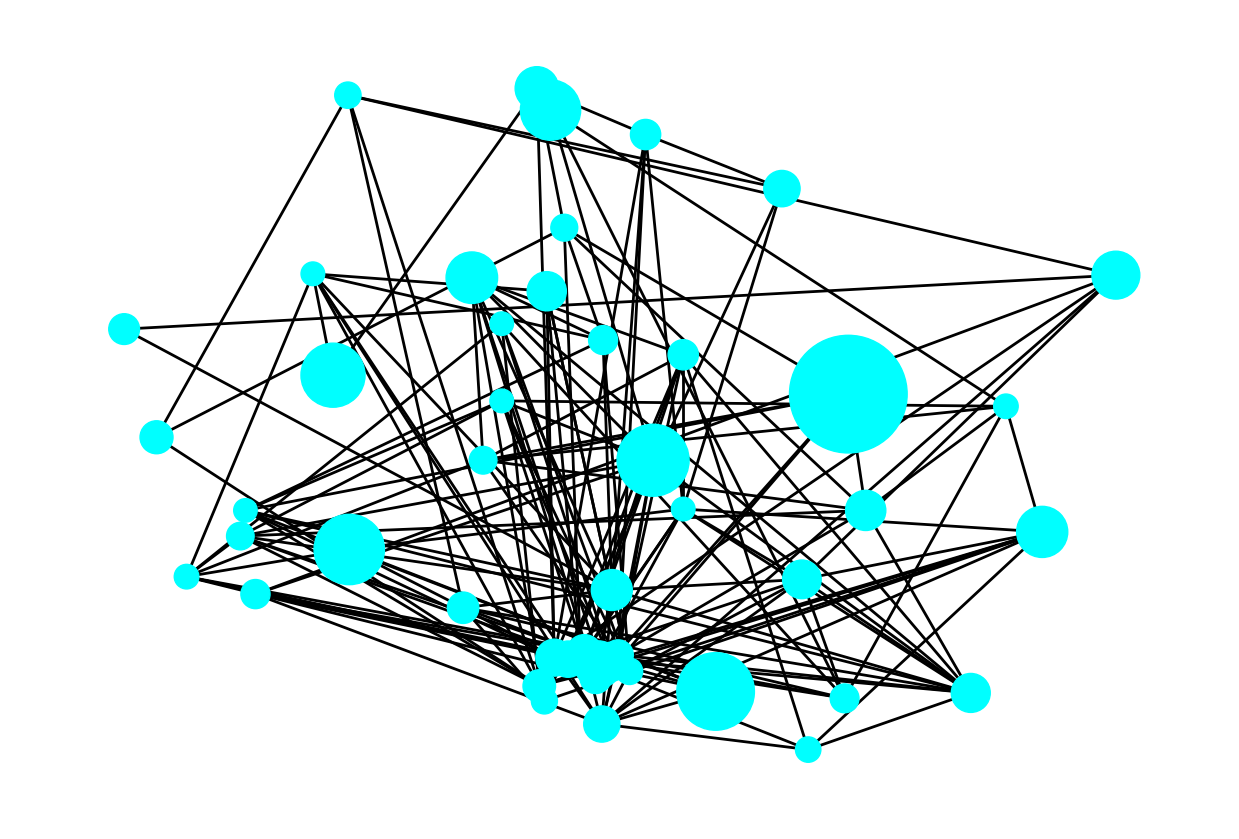

In [24]:
graph.update(nx.complete_graph(n=len(graph.nodes)))
graph.optimise(n_mutations=1000)
print(f"Total length of the graph:\t{graph.total_length:.3f} km")
print(f"Edge connectivity:\t\t{nx.edge_connectivity(graph)}")
print(f"Node connectivity:\t\t{nx.node_connectivity(graph)}")
print(f"Average node connectivity:\t{nx.average_node_connectivity(graph):.3f}")
nx.draw(graph, 
        pos=list(zip(tdf.Longitude, tdf.Latitude)), 
        with_labels=False, 
        node_color="cyan", 
        node_size=tdf.Population / 1e3, 
        labels=nx.get_node_attributes(graph,"City"),\
        font_color="k")